# USL Case Study

### Dataset Information: 
You are provided with historical data on Coffee supply chain from Jan 2010 to Dec 2011. There are 3 Tables – Fact Table, Location and Product. These three tables are merged and provided as one table for this examination purpose.

Attribute description is as below: 

1.	Profit – Profit made
2.	Margin – Margin between the selling price and cost of production
3.	Sales – sales amount of a product
4.	COGS - Cost of goods sold (COGS) is the direct costs attributable to the production of the goods sold in a company. This amount includes the cost of the materials used in creating the good along with the direct labor costs used to produce the good. It excludes indirect expenses such as distribution costs and sales force costs.
5.	Total Expenses
6.	Marketing Expenses
7.	Inventory – Quantity in store
8.	Budget Profit – Predicted Profit
9.	Budget COGS – Predicted COGS
10.	Budget Margin – Predicted Margin
11.	Budget Sales – Predicted sale amount of a product
12.	Area Code – Location code
13.	ProductId
14.	State – Name of the state in USA
15.	Market – Regions 
16.	Market Size – small, medium, large etc.
17.	Product Type – Type of the coffee / Tea
18.	Product – Product Name
19.	Type  - Product Classification. 

In [157]:
# import all libraries and dependencies for dataframe

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta

# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
#pd.set_option('display.max_colwidth', -1) 
sns.set(style='darkgrid')
import matplotlib.ticker as plticker
%matplotlib inline

# import all libraries and dependencies for machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

# import all libraries and dependencies for clustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

### 1.	Data Understanding

a.	Read the dataset (tab, csv, xls, txt, inbuilt dataset). Print the number of rows, cols and types of variables (continuous, categorical etc.)? 

b.	Calculate five-point summary for numerical variables.

c.	Summarize observations for categorical variables – no. of categories, % observations in each category.  

d.	Generate the covariance and correlation tables for the data.

e.	Create Visualization plots to find the relationship amongst the variables.


##### a. Read the dataset (tab, csv, xls, txt, inbuilt dataset). What are the number of rows and no. of cols & types of variables (continuous, categorical etc.)?

In [158]:
data = pd.read_csv('coffee_chain.csv')
data.head()

,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,Area Code,ProductId,State,Market,Market Size,Product Type,Product,Type
0,94,130,219,89,36,24,777,100,90,130,220,719,1,Colorado,Central,Major Market,Coffee,Amaretto,Regular
1,121,163,276,113,42,31,897,130,110,170,280,719,1,Colorado,Central,Major Market,Coffee,Amaretto,Regular
2,134,179,302,123,45,34,959,130,120,170,290,719,1,Colorado,Central,Major Market,Coffee,Amaretto,Regular
3,146,130,245,89,38,24,777,100,90,130,220,719,1,Colorado,Central,Major Market,Coffee,Amaretto,Regular
4,167,163,274,113,39,31,897,130,110,170,280,719,1,Colorado,Central,Major Market,Coffee,Amaretto,Regular


In [159]:
print("the number of rows are ",data.shape[0])
print("the number of columns are ",data.shape[1])

the number of rows are  4248
the number of columns are  19


##### b. Calculate five-point summary for numerical variables

In [160]:
data.describe()

,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,Area Code,ProductId
count,4248.0000,4248.0000,4248.0000,4248.0000,4248.0000,4248.0000,4248.0000,4248.0000,4248.0000,4248.0000,4248.0000,4248.0000,4248.0000
mean,61.0977,104.2933,192.9875,84.4331,54.0636,31.1850,749.3814,60.9134,74.8305,100.8192,175.6497,582.2780,6.8870
std,101.7085,94.3425,151.1331,67.2498,32.3526,27.0233,661.0319,79.5461,66.2381,92.6027,148.8915,221.1403,3.6641
min,-638.0000,-302.0000,17.0000,0.0000,10.0000,0.0000,-3534.0000,-320.0000,0.0000,-210.0000,0.0000,203.0000,1.0000
25%,17.0000,52.7500,100.0000,43.0000,33.0000,13.0000,432.0000,20.0000,30.0000,50.0000,80.0000,417.0000,4.0000
50%,40.0000,76.0000,138.0000,60.0000,46.0000,22.0000,619.0000,40.0000,50.0000,70.0000,130.0000,573.0000,6.0000
75%,92.0000,132.0000,230.0000,100.0000,65.0000,39.0000,910.5000,80.0000,90.0000,130.0000,210.0000,772.0000,10.0000
max,778.0000,613.0000,912.0000,364.0000,190.0000,156.0000,8252.0000,560.0000,450.0000,690.0000,1140.0000,985.0000,13.0000


In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Profit          4248 non-null   int64 
 1   Margin          4248 non-null   int64 
 2   Sales           4248 non-null   int64 
 3   COGS            4248 non-null   int64 
 4   Total Expenses  4248 non-null   int64 
 5   Marketing       4248 non-null   int64 
 6   Inventory       4248 non-null   int64 
 7   Budget Profit   4248 non-null   int64 
 8   Budget COGS     4248 non-null   int64 
 9   Budget Margin   4248 non-null   int64 
 10  Budget Sales    4248 non-null   int64 
 11  Area Code       4248 non-null   int64 
 12  ProductId       4248 non-null   int64 
 13  State           4248 non-null   object
 14  Market          4248 non-null   object
 15  Market Size     4248 non-null   object
 16  Product Type    4248 non-null   object
 17  Product         4248 non-null   object
 18  Type    

##### c. Summarize observations for categorical variables – no. of categories, % observations in each category.

In [162]:
data_cat=data.select_dtypes(include ='object') 
data_cat.describe()

,State,Market,Market Size,Product Type,Product,Type
count,4248,4248,4248,4248,4248,4248
unique,20,4,2,4,13,2
top,Utah,Central,Small Market,Espresso,Lemon,Regular
freq,288,1344,2544,1176,480,2400


In [163]:
data_cat.shape

(4248, 6)

Utah            6.7797
California      6.7797
Colorado        6.2147
Nevada          6.2147
Oregon          6.2147
Washington      5.6497
Wisconsin       5.0847
Illinois        5.0847
Missouri        5.0847
Iowa            5.0847
Florida         5.0847
Ohio            5.0847
New York        4.5198
New Hampshire   3.9548
Louisiana       3.9548
New Mexico      3.9548
Oklahoma        3.9548
Texas           3.9548
Connecticut     3.9548
Massachusetts   3.3898
Name: State, dtype: float64


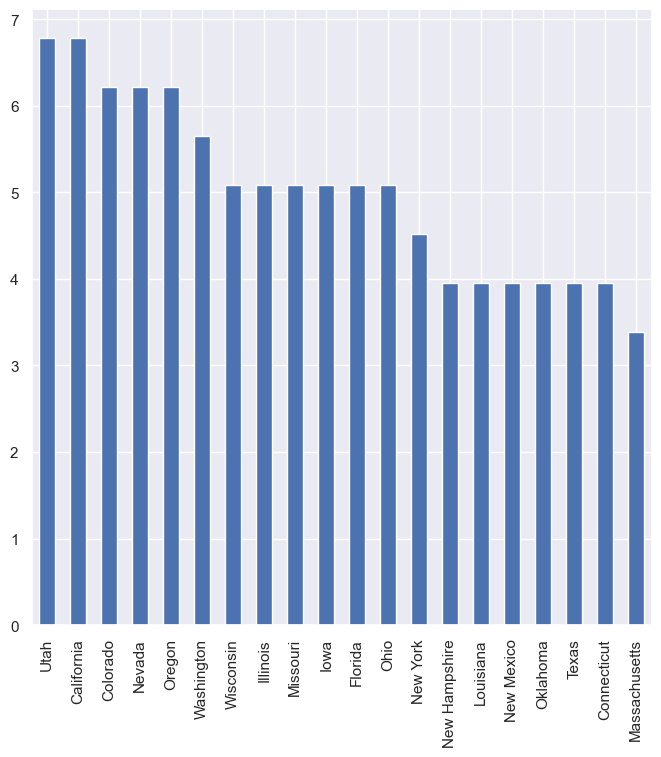

Central   31.6384
West      31.6384
East      20.9040
South     15.8192
Name: Market, dtype: float64


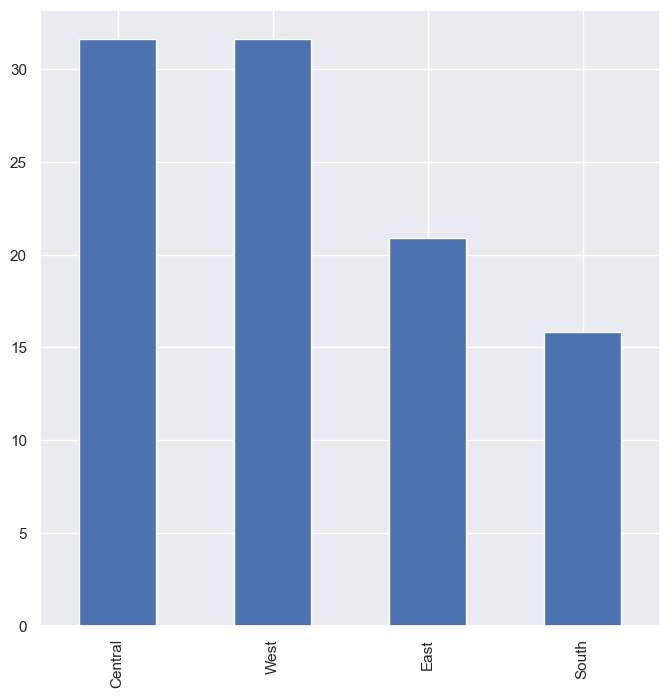

Small Market   59.8870
Major Market   40.1130
Name: Market Size, dtype: float64


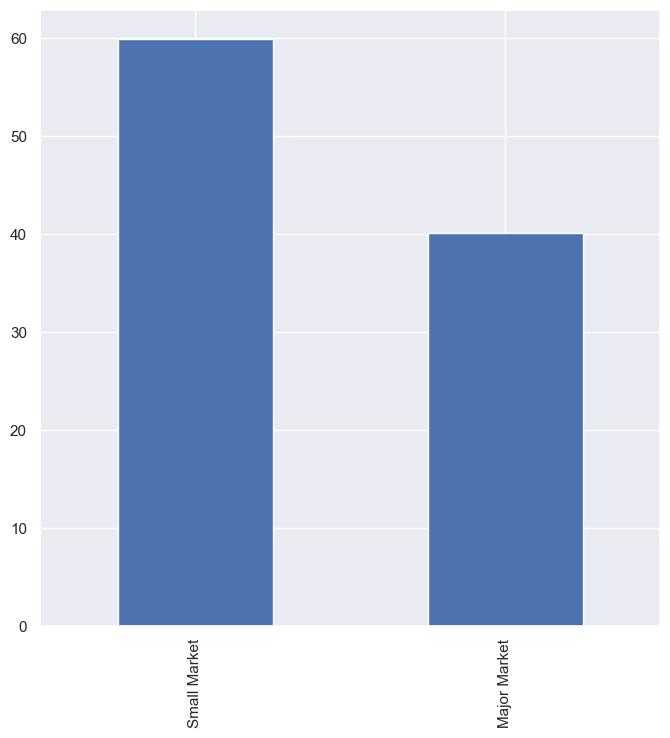

Espresso     27.6836
Coffee       24.8588
Herbal Tea   24.8588
Tea          22.5989
Name: Product Type, dtype: float64


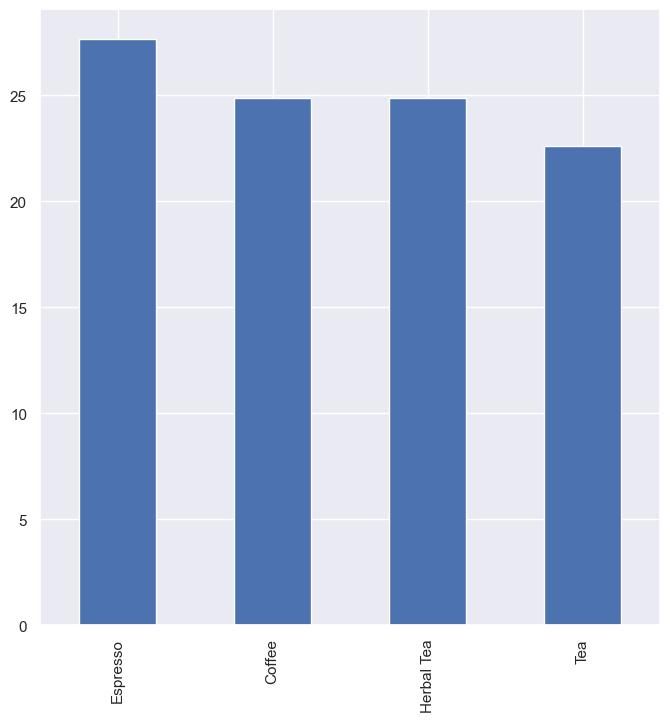

Lemon               11.2994
Caffe Mocha         11.2994
Columbian           11.2994
Decaf Espresso       9.6045
Darjeeling           9.0395
Decaf Irish Cream    9.0395
Chamomile            9.0395
Earl Grey            6.7797
Green Tea            6.7797
Caffe Latte          5.0847
Amaretto             4.5198
Mint                 4.5198
Regular Espresso     1.6949
Name: Product, dtype: float64


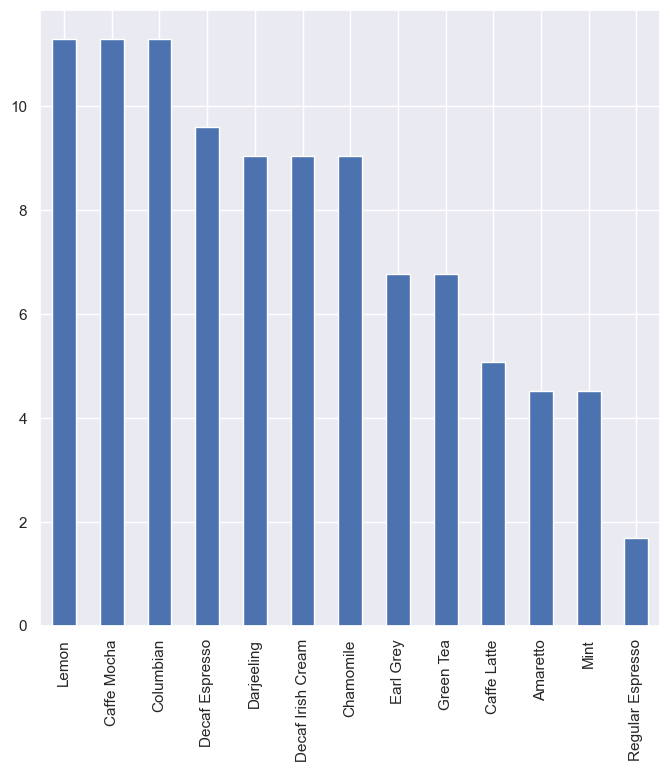

Regular   56.4972
Decaf     43.5028
Name: Type, dtype: float64


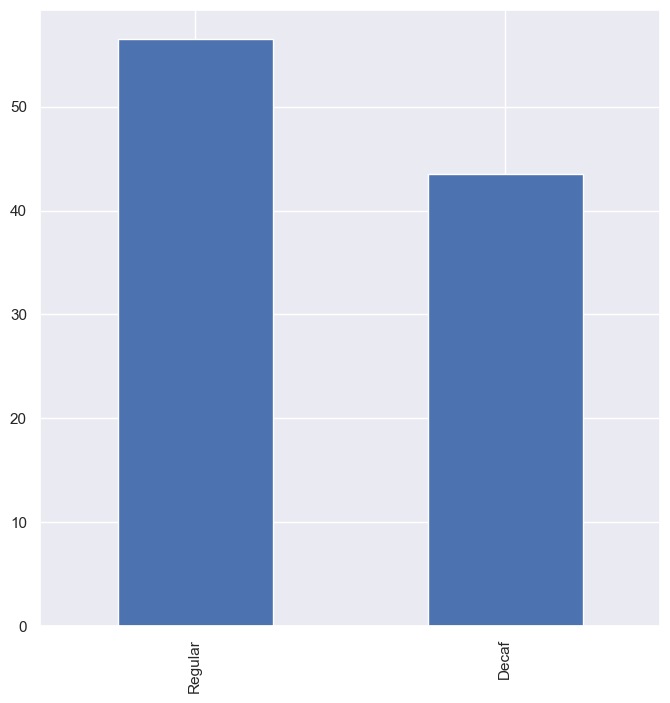

In [164]:
for i in data_cat.columns:  
    print(data[i].value_counts(normalize=True)*100)
    (data[i].value_counts(normalize=True)*100).plot(kind='bar')
    plt.show()

In [165]:
data.isnull().sum().sum()

0

##### d. Generate the covariance and correlation tables for the data

In [166]:
data_num=data.select_dtypes(exclude ='object') 
print('The covariance matrix')
data_num.cov()

The covariance matrix


,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,Area Code,ProductId
Profit,10344.6283,8833.6024,12256.1964,3179.4359,658.0286,619.6899,-6154.7966,7585.7219,3232.8221,8258.5472,11491.3693,314.4082,-21.8731
Margin,8833.6024,8900.5115,13385.8085,4306.6344,1590.9858,1356.1675,3820.3115,6925.3172,4252.7999,8417.1460,12669.9460,610.8320,-27.5143
Sales,12256.1964,13385.8085,22841.2221,9011.6280,3370.6109,2901.8212,32562.0057,9803.2019,8638.1201,12886.3111,21524.4312,1845.5295,-26.6235
COGS,3179.4359,4306.6344,9011.6280,4522.5314,1702.5625,1487.0500,27609.9271,2754.7962,4221.8064,4288.1829,8509.9893,1196.7310,0.5279
Total Expenses,658.0286,1590.9858,3370.6109,1702.5625,1046.6906,844.6932,9275.3169,658.3361,1594.9295,1590.1716,3185.1011,318.7464,-8.6973
Marketing,619.6899,1356.1675,2901.8212,1487.0500,844.6932,730.2568,8891.6695,600.4149,1384.9172,1358.9160,2743.8331,306.1583,-4.1811
Inventory,-6154.7966,3820.3115,32562.0057,27609.9271,9275.3169,8891.6695,436963.1670,-1013.5295,25390.1753,7307.2458,32697.4211,9939.9627,163.3852
Budget Profit,7585.7219,6925.3172,9803.2019,2754.7962,658.3361,600.4149,-1013.5295,6327.5856,3051.6736,6995.2017,10046.8752,210.9845,-43.0661
Budget COGS,3232.8221,4252.7999,8638.1201,4221.8064,1594.9295,1384.9172,25390.1753,3051.6736,4387.4919,4602.9644,8990.4563,933.3636,-38.0272
Budget Margin,8258.5472,8417.1460,12886.3111,4288.1829,1590.1716,1358.9160,7307.2458,6995.2017,4602.9644,8575.2647,13178.2291,468.3594,-59.4789


In [167]:
cor=data_num.corr()
cor

,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,Area Code,ProductId
Profit,1.0000,0.9206,0.7973,0.4648,0.2000,0.2255,-0.0915,0.9376,0.4799,0.8768,0.7588,0.0140,-0.0587
Margin,0.9206,1.0000,0.9388,0.6788,0.5213,0.5319,0.0613,0.9228,0.6805,0.9635,0.9020,0.0293,-0.0796
Sales,0.7973,0.9388,1.0000,0.8867,0.6894,0.7105,0.3259,0.8154,0.8629,0.9208,0.9565,0.0552,-0.0481
COGS,0.4648,0.6788,0.8867,1.0000,0.7825,0.8183,0.6211,0.5150,0.9478,0.6886,0.8499,0.0805,0.0021
Total Expenses,0.2000,0.5213,0.6894,0.7825,1.0000,0.9662,0.4337,0.2558,0.7443,0.5308,0.6612,0.0446,-0.0734
Marketing,0.2255,0.5319,0.7105,0.8183,0.9662,1.0000,0.4978,0.2793,0.7737,0.5430,0.6819,0.0512,-0.0422
Inventory,-0.0915,0.0613,0.3259,0.6211,0.4337,0.4978,1.0000,-0.0193,0.5799,0.1194,0.3322,0.0680,0.0675
Budget Profit,0.9376,0.9228,0.8154,0.5150,0.2558,0.2793,-0.0193,1.0000,0.5792,0.9496,0.8483,0.0120,-0.1478
Budget COGS,0.4799,0.6805,0.8629,0.9478,0.7443,0.7737,0.5799,0.5792,1.0000,0.7504,0.9116,0.0637,-0.1567
Budget Margin,0.8768,0.9635,0.9208,0.6886,0.5308,0.5430,0.1194,0.9496,0.7504,1.0000,0.9558,0.0229,-0.1753


In [168]:
# The following features have correaltion more than 0.8 with few other feature as listed below
(len(cor)-1)-(cor[(cor>0.8) | (cor<-0.8)]).isnull().sum()

Profit            3
Margin            5
Sales             6
COGS              4
Total Expenses    1
Marketing         2
Inventory         0
Budget Profit     5
Budget COGS       3
Budget Margin     5
Budget Sales      6
Area Code         0
ProductId         0
dtype: int64

##### e. Create Visualization plots to find the relationship amongst the variables.

(13.5, -0.5)

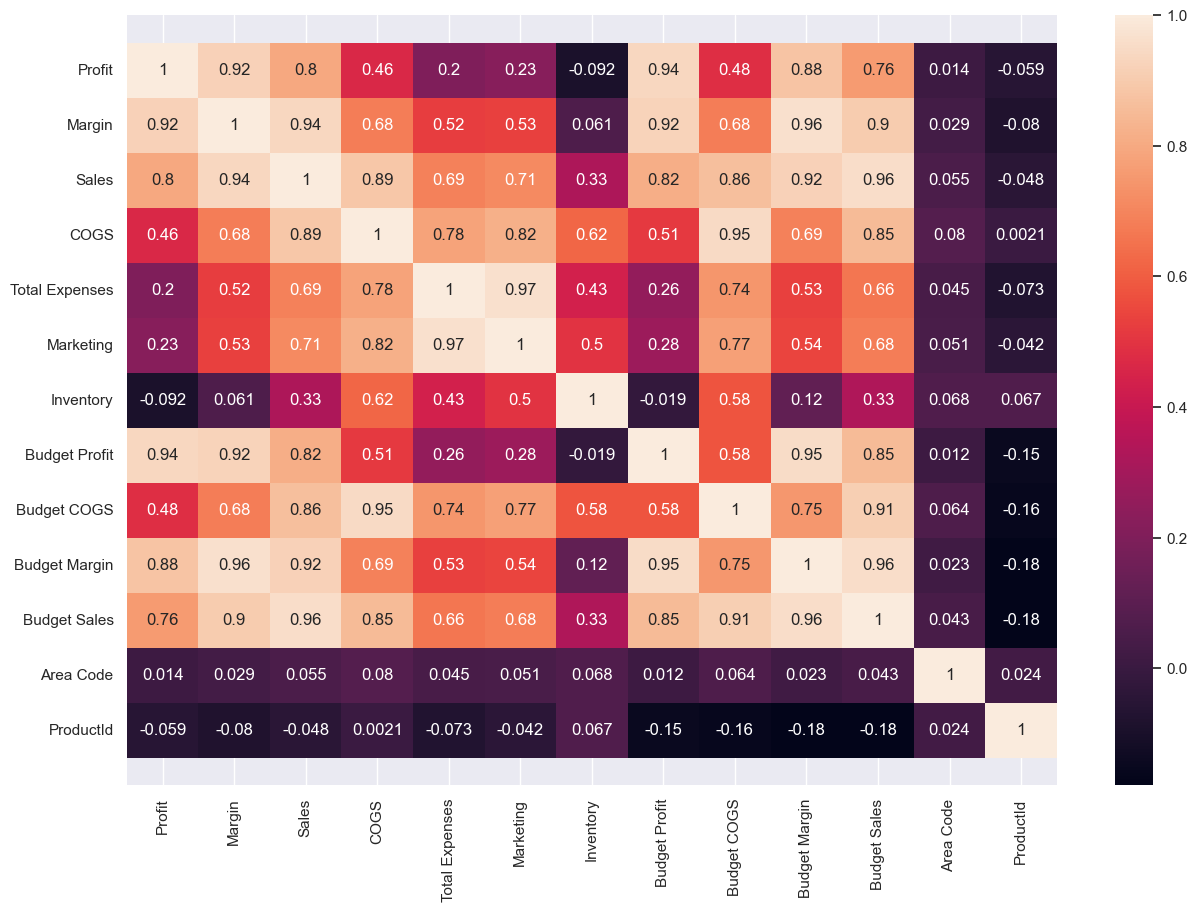

In [169]:
# Heatmap to understand the attributes dependency
plt.figure(figsize = (15,10))        
ax = sns.heatmap(data_num.corr(),annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [170]:
# The following features have correaltion more than 0.8 with few other feature as listed below
(len(cor)-1)-(cor[(cor>0.8) | (cor<-0.8)]).isnull().sum()

Profit            3
Margin            5
Sales             6
COGS              4
Total Expenses    1
Marketing         2
Inventory         0
Budget Profit     5
Budget COGS       3
Budget Margin     5
Budget Sales      6
Area Code         0
ProductId         0
dtype: int64

#### Inference:
The above features have correaltion more than 0.8 with few other feature

In [171]:
# Pairplot of all numeric columns

#sns.pairplot(data)

In [172]:
#Students can come-up with their own way of visualizing the data

### 2.	Data Preparation

a.	Scale / Transform/ clean the data so that it is suitable for model building.


In [173]:
data_num.head()

,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,Area Code,ProductId
0,94,130,219,89,36,24,777,100,90,130,220,719,1
1,121,163,276,113,42,31,897,130,110,170,280,719,1
2,134,179,302,123,45,34,959,130,120,170,290,719,1
3,146,130,245,89,38,24,777,100,90,130,220,719,1
4,167,163,274,113,39,31,897,130,110,170,280,719,1


 As we need to cluster the data based on the sale and profit charecteristics , we can drop area code and product Id from the dataset, Later we can use these to evaluate the culster quality.

In [174]:
data_num=data_num.drop(columns=['Area Code','ProductId'],axis=1)

In [175]:
# Encoding of Categorical variable
data_cat.head(2)

,State,Market,Market Size,Product Type,Product,Type
0,Colorado,Central,Major Market,Coffee,Amaretto,Regular
1,Colorado,Central,Major Market,Coffee,Amaretto,Regular


Market and Market size may have impact on sales and profit. so I keep these two in my dataset and other informations we can use while evalutaing the cluster nature.

In [176]:
data_cat=data_cat.drop(columns=['State','Product Type','Product','Type'],axis=1)

In [177]:
data_cat['Market']=data_cat['Market'].replace({'Central':0,'East':1,'West':2,'South':3})
data_cat['Market Size']=data_cat['Market Size'].replace({'Major Market':1,'Small Market':1})

In [178]:
data_cat.head(2)

,Market,Market Size
0,0,1
1,0,1


In [179]:
data_full=pd.concat([data_num,data_cat],axis=1)

In [180]:
# Standarisation technique for scaling
scaler = StandardScaler()
data_sc = scaler.fit_transform(data_full)
data_sc=pd.DataFrame(data_sc,columns=data_full.columns)

In [181]:
data_sc.head(2)

,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,Market,Market Size
0,0.3235,0.2725,0.1721,0.0679,-0.5584,-0.2659,0.0418,0.4914,0.2290,0.3152,0.2979,-1.2194,0.0000
1,0.5890,0.6223,0.5493,0.4248,-0.3729,-0.0068,0.2233,0.8686,0.5310,0.7472,0.7009,-1.2194,0.0000


### 3.	Dimensionality Reduction

a.	How will you decide when to apply PCA based on the correlation?

b.	Apply PCA on the above dataset and determine the number of PCA components to be used so that 90% of the variance in data is explained by the same.

c.	Build a data frame with the principal components and check if multi-collinearity still exists. 

d.	Visualize the spread of data across PCA components.

e.	Check for outliers in the PCA data and treat the same.


##### PCA Application


Principal component analysis (PCA) is one of the most commonly used `dimensionality reduction` techniques in the industry. By converting large data sets into smaller ones containing fewer variables, it helps in improving model performance, visualising complex data sets, and in many more areas.


Profit            3
Margin            5
Sales             6
COGS              4
Total Expenses    1
Marketing         2
Inventory         0
Budget Profit     5
Budget COGS       3
Budget Margin     5
Budget Sales      6
Area Code         0
ProductId         0
dtype: int64

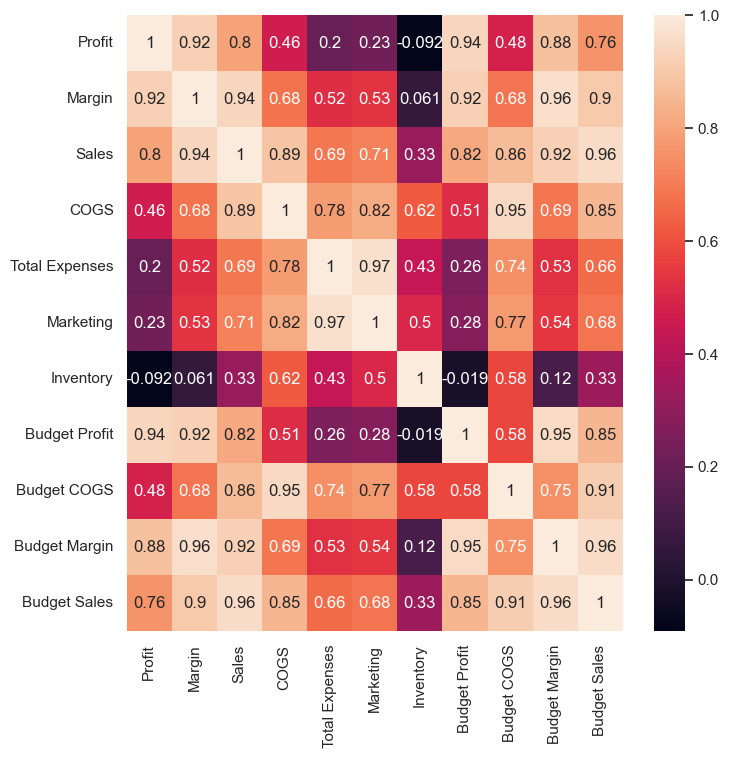

In [182]:
#plt.figure(figsize=(10,8))
sns.heatmap(data_num.corr(),annot=True)
# The following features have correaltion more than 0.8 with few other feature as listed below
(len(cor)-1)-(cor[(cor>0.8) | (cor<-0.8)]).isnull().sum()

From the above table, we can see there are features which are correalted with each other. PCA can smartly use the required contribution from each feature to emulate the overall charecteristics of data. Hence it will lead to dimensionality reduction.

In [183]:
data_sc.shape

(4248, 13)

In [184]:
from sklearn.decomposition import PCA 
pca = PCA(n_components = data_sc.shape[1])
pca_data = pca.fit_transform(data_sc)
exp_var_ratio= pca.explained_variance_ratio_
exp_var_ratio.round(3)

cum_var=exp_var_ratio[0]
itr=2 # defined as two as first pc1 variance defined outside the loop
for j in exp_var_ratio[1:]:
    cum_var=cum_var+j
    if cum_var >= 0.90:
        break
    itr=itr+1

print('The number of principle components capturing 90 percent varaition is data is : ',itr,' Varaince explained is ', cum_var)

The number of principle components capturing 90 percent varaition is data is :  3  Varaince explained is  0.9141730038918977


In [185]:
exp_var_ratio

array([6.45482136e-01, 1.84754974e-01, 8.39358946e-02, 5.34646305e-02,
       1.46836285e-02, 1.10691050e-02, 2.76343018e-03, 2.48616339e-03,
       1.00467901e-03, 2.50595704e-04, 1.04763865e-04, 2.59102307e-33,
       0.00000000e+00])

In [186]:
exp_var_ratio[:itr].sum()

0.9141730038918977

In [187]:
pc=exp_var_ratio[:itr]

In [188]:
pc

array([0.64548214, 0.18475497, 0.08393589])

Text(0, 0.5, 'Variance Ratio')

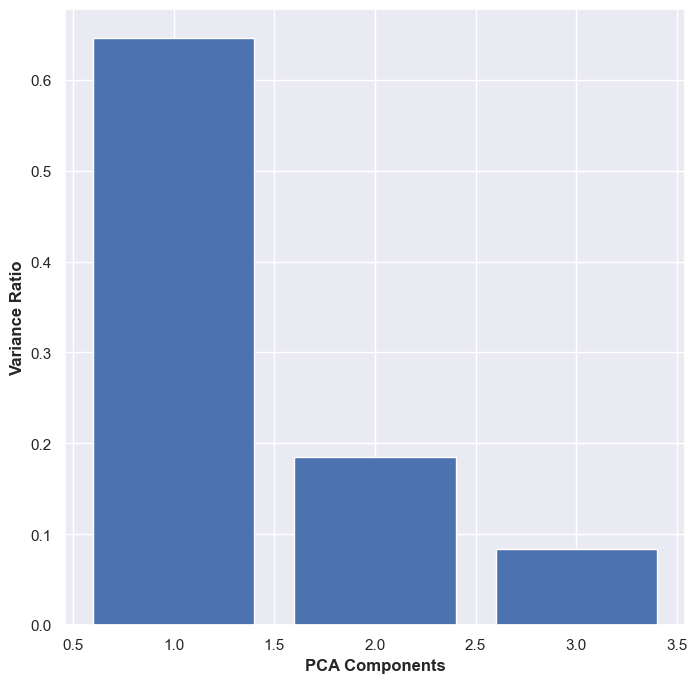

In [189]:
# Variance Ratio bar plot for each PCA components.
ax = plt.bar(range(1,len(pc)+1), pc)
plt.xlabel("PCA Components",fontweight = 'bold')
plt.ylabel("Variance Ratio",fontweight = 'bold')

In [190]:
#Select only 3 PCs
pcadata=pca_data[:,:itr]
pcadata.shape

(4248, 3)

In [191]:
#pd.DataFrame(pca.components_[:itr].T, index= data_sc.columns)

In [192]:
pd.DataFrame(pcadata).corr()

,0,1,2
0,1.0000,-0.0000,-0.0000
1,-0.0000,1.0000,-0.0000
2,-0.0000,-0.0000,1.0000


In [193]:
# we can clear see the correaltion between PCs are zero, therefore no multi-collinearity exist.

Text(0, 0.5, 'Cumulative Explained Variance')

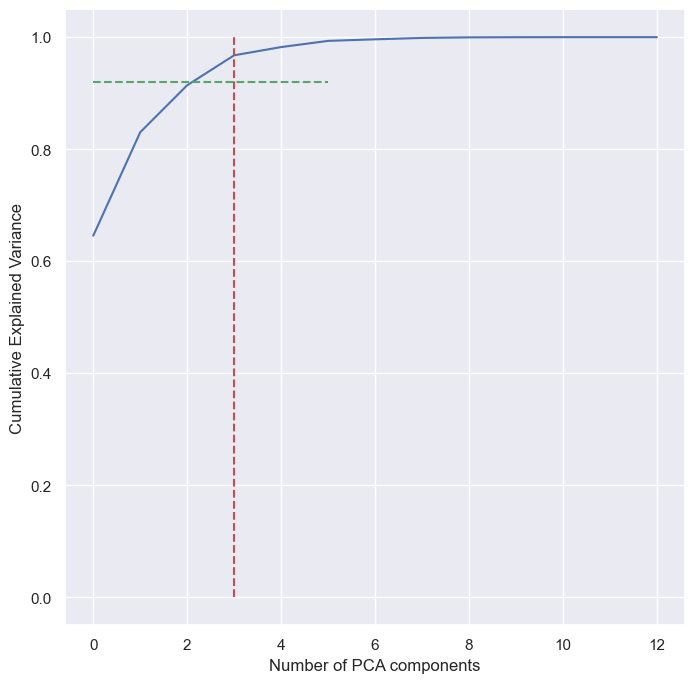

In [194]:
# Scree plot to visualize the Cumulative variance against the Number of components

#fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.vlines(x=3, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.92, xmax=5, xmin=0, colors="g", linestyles="--")
plt.xlabel('Number of PCA components')
plt.ylabel('Cumulative Explained Variance')

#### Inference:
It is evident from the above Scree plot that more than 90% variance is explained by the first 3 principal components.
Hence, we will use these components only going forward for Clustering process.

In [195]:
'PC'+ str(i)

'PCType'

In [196]:
# Checking which attributes are well explained by the pca components
attributes_pca=pd.DataFrame()
for i in range(3):
    attributes_pca['PC'+str(i+1)]=pca.components_[i]
attributes_pca['Attribute']=data_sc.columns
attributes_pca

,PC1,PC2,PC3,Attribute
0,0.2714,-0.4111,0.0029,Profit
1,0.3297,-0.2394,0.0324,Margin
2,0.3549,-0.0371,0.0154,Sales
3,0.3209,0.2459,-0.0107,COGS
4,0.2624,0.3543,0.0846,Total Expenses
5,0.2709,0.3629,0.0655,Marketing
6,0.1336,0.4766,-0.1639,Inventory
7,0.2910,-0.3714,-0.0054,Budget Profit
8,0.3249,0.2020,-0.0173,Budget COGS
9,0.3359,-0.2130,0.0097,Budget Margin


In [197]:
# Checking which attributes are well explained by the pca components
#org_col = list(data_sc.columns)
#attributes_pca = pd.DataFrame({'Attribute':org_col,'PC_1':pca.components_[0],'PC_2':pca.components_[1],'PC_3':pca.components_[2],
#                              'PC_4':pca.components_[3],'PC_5':pca.components_[4],'PC_6':pca.components_[5],'PC_6':pca.components_[6],
#                              'PC_8':pca.components_[7],'PC_8':pca.components_[8],'PC_10':pca.components_[9],'PC_11':pca.components_[10],
#                              'PC_12':pca.components_[11],'PC_13':pca.components_[12],'PC_14':pca.components_[13],'PC_15':pca.components_[12],
#                              'PC_16':pca.components_[15],'PC_17':pca.components_[16],'PC_18':pca.components_[17],'PC_19':pca.components_[18],
#                              'PC20':pca.components_[19]})

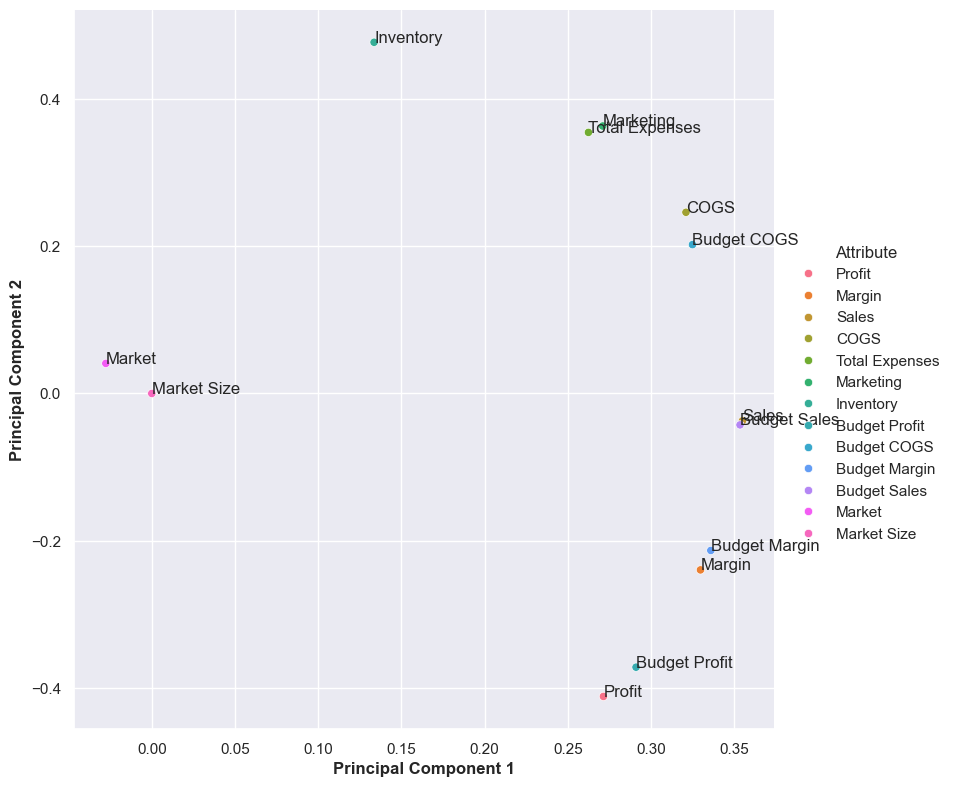

In [198]:
# Plotting the above dataframe for better visualization with PC1 and PC2
sns.pairplot(data=attributes_pca, x_vars=["PC1"], y_vars=["PC2"], hue = "Attribute" ,height=8)
plt.xlabel("Principal Component 1",fontweight = 'bold')
plt.ylabel("Principal Component 2",fontweight = 'bold')

for i,txt in enumerate(attributes_pca.Attribute):
    plt.annotate(txt, (attributes_pca.PC1[i],attributes_pca.PC2[i]))

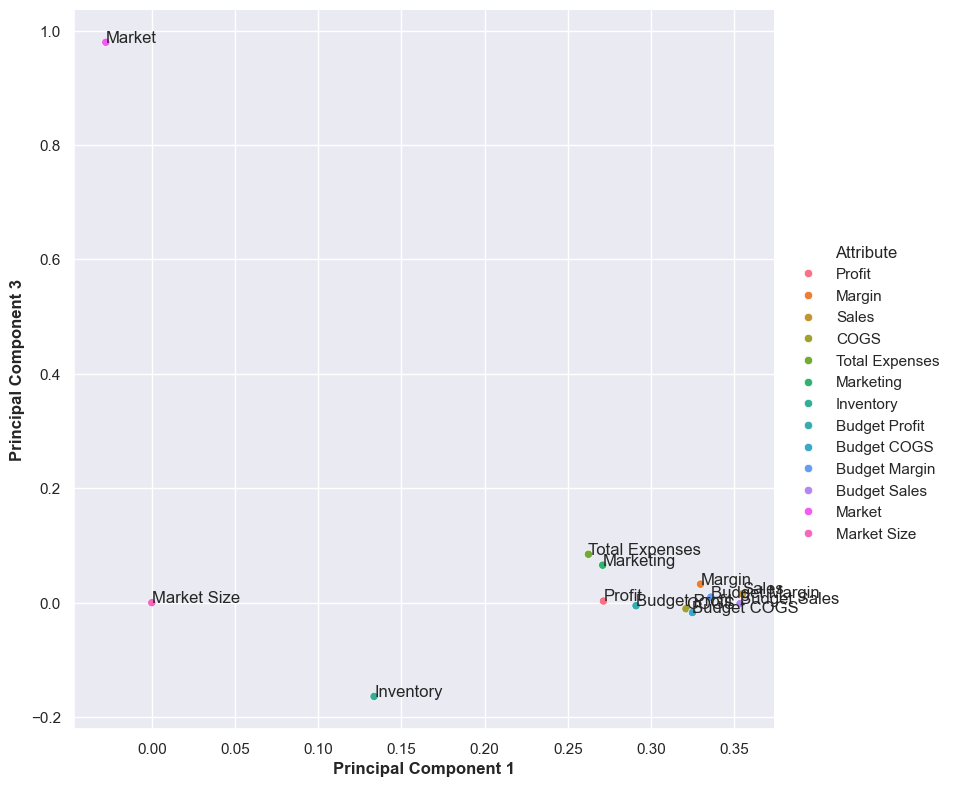

In [199]:
# Plotting the above dataframe for better visualization with PC1 and PC3

sns.pairplot(data=attributes_pca, x_vars=["PC1"], y_vars=["PC3"], hue = "Attribute" ,height=8)
plt.xlabel("Principal Component 1",fontweight = 'bold')
plt.ylabel("Principal Component 3",fontweight = 'bold')

for i,txt in enumerate(attributes_pca.Attribute):
    plt.annotate(txt, (attributes_pca.PC1[i],attributes_pca.PC3[i]))

Since 90% variance is explained by 3 principal components, lets build the dataframe using those 3 components only.

In [200]:
pcadata.shape

(4248, 3)

In [201]:
col=list(np.arange(1,pcadata.shape[1]+1))
col

[1, 2, 3]

In [202]:
# Creating new dataframe with Principal components

df_pca_final = pd.DataFrame(pcadata, columns=col)
#df_pca_final = pd.concat([data['country'], df_pca], axis=1)
df_pca_final.head()

,1,2,3
0,0.5098,-0.7282,-1.2585
1,1.5840,-0.7894,-1.2452
2,1.9232,-0.7068,-1.2413
3,0.7258,-0.9229,-1.2492
4,1.6777,-1.0077,-1.2520


<Axes: xlabel='2', ylabel='3'>

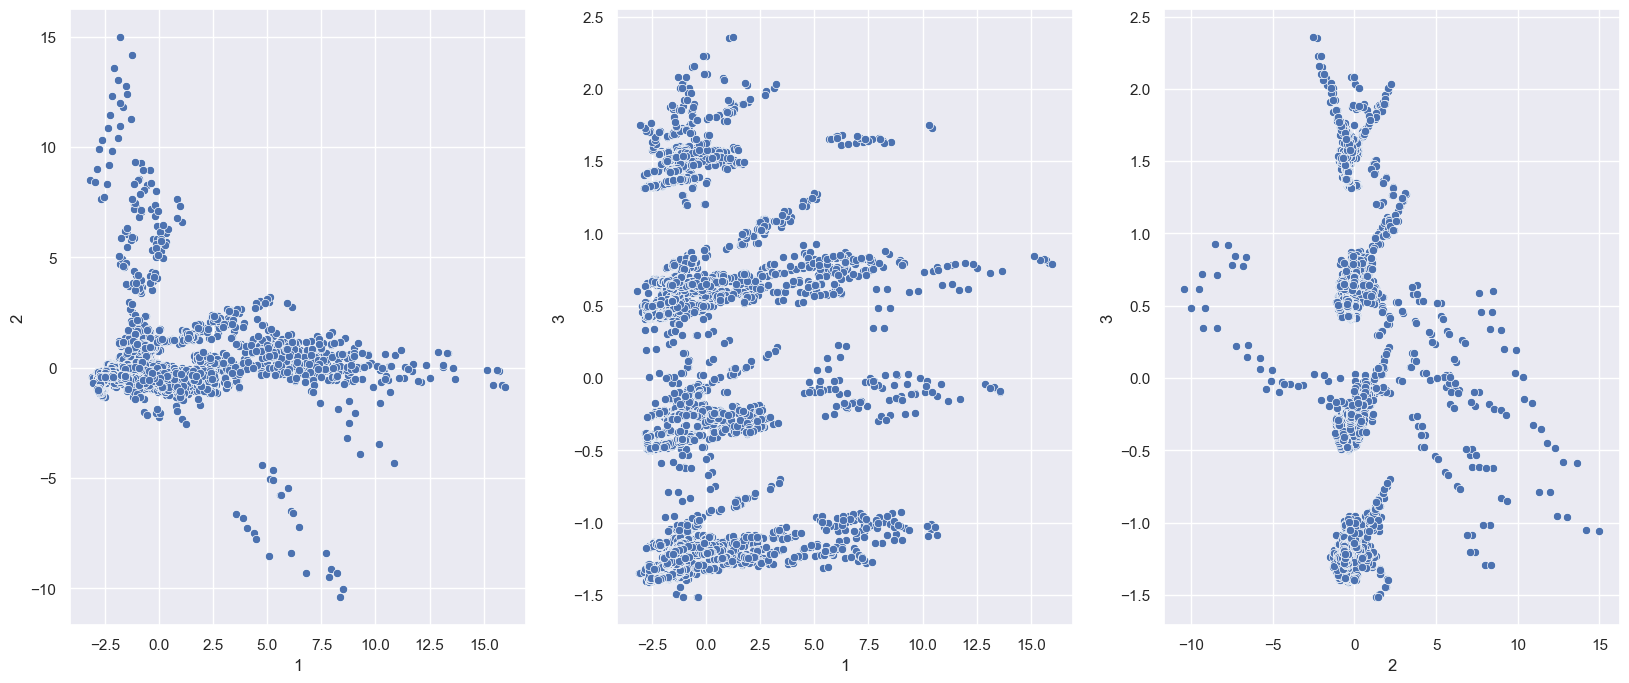

In [203]:
# Scatter Plot to visualize the spread of data across PCA components
plt.figure(figsize=(20, 8))
plt.subplot(1,3,1)
sns.scatterplot(data=df_pca_final, x=1, y=2)
plt.subplot(1,3,2)
sns.scatterplot(data=df_pca_final, x=1, y=3)
plt.subplot(1,3,3)
sns.scatterplot(data=df_pca_final, x=2, y=3)

#### Outlier Analysis and Treatment

There are 2 types of outliers and we will treat outliers as it can skew our dataset¶
- Statistical
- Domain specific

Text(0.5, 0, 'PC Components')

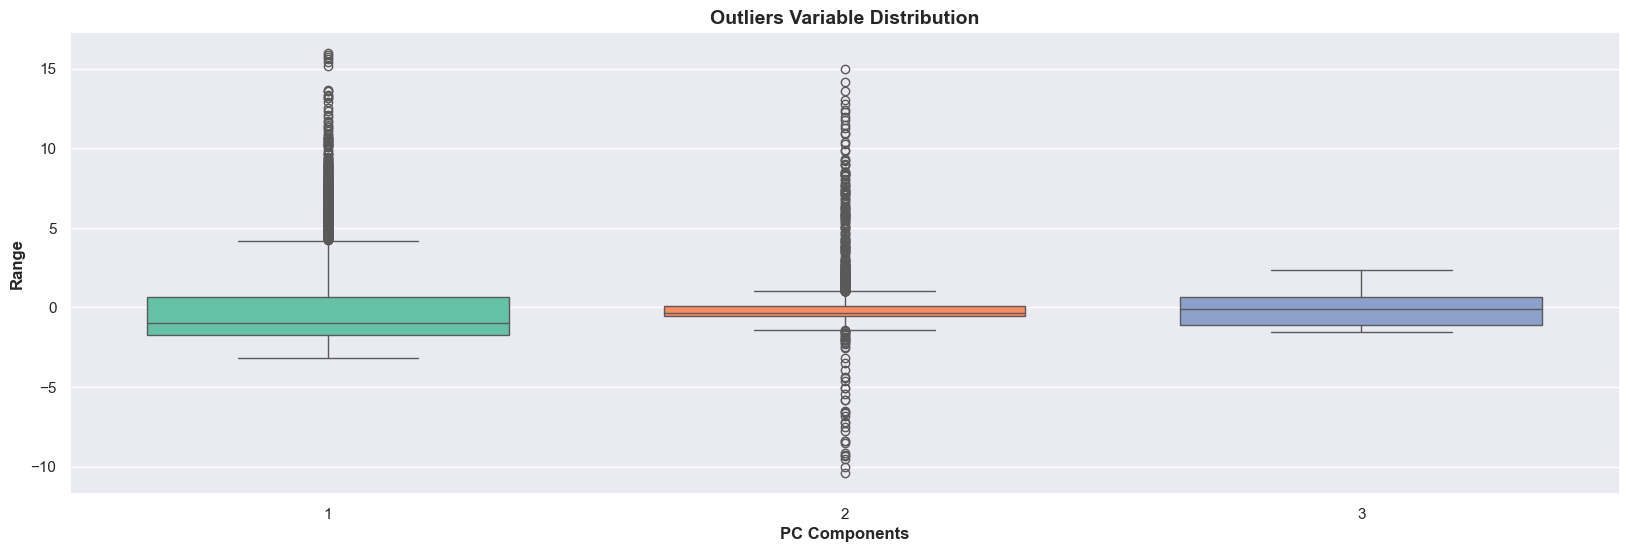

In [204]:
# Outlier Analysis 

outliers = col
plt.figure(figsize=(20,6))
sns.boxplot(data = df_pca_final[outliers], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("PC Components", fontweight = 'bold')

In [205]:
#Students can apply any statergy based on domain understanding to treat outiler 
    #(like dropping them or capping them). Also they can keep the outlier and do further analysis provided the outliers are not exist by mistake.
# Statstical Outlier treatment for PC_1

#Q1 = df_pca_final.PC_1.quantile(0.05)
#Q3 = df_pca_final.PC_1.quantile(0.95)
#IQR = Q3 - Q1
#df_pca_final = df_pca_final[(df_pca_final.PC_1 >= Q1) & (df_pca_final.PC_1 <= Q3)]




### 4.	Clustering: Use PCA dimensions to cluster the data. Apply K-means and Agglomerative clustering. 


Some pointers which would help you, but don’t be limited by these

a.	Apply Clustering and visualize the spread of data

b.  Find the optimal number of cluster Value.

c.	Evaluate the clusters formed using appropriate metrics (inertia, silhouette score) to support the model built and compare both the models.

d.	Using best attributes based on the relationship between them, plot the clusters.


#### K- means Clustering

K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.

The algorithm works as follows:

First we initialize k points, called means, randomly.
We categorize each item to its closest mean and we update the mean’s coordinates, which are the averages of the items categorized in that mean so far.
We repeat the process for a given number of iterations and at the end, we have our clusters.

#### **Finding the Optimal Number of Clusters**

#### Elbow Curve to get the right number of Clusters
A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

46600.88304639341
23486.44434429981
18040.550234192488
12856.798357933912
10468.69774520613
9068.226041309925
7796.816716402217
6896.822344179912
6079.631179688224
5501.983924292323
4948.137617215468
4562.582007506881


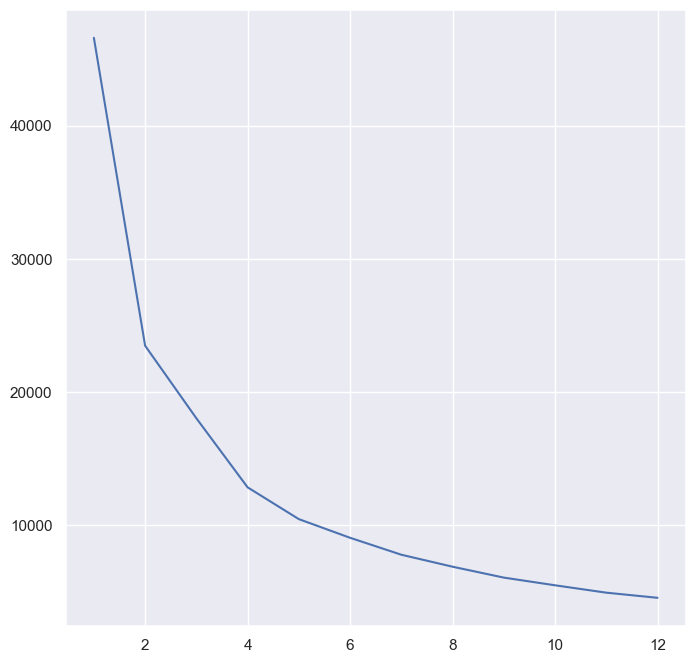

In [206]:
# K-means Clustering
wcss=[]
cl=[1,2,3,4,5,6,7,8,9,10,11,12]
for k in cl:
    mod=KMeans(k)
    mod.fit(pcadata)
    print(mod.inertia_)
    wcss.append(mod.inertia_)
plt.plot(cl,wcss)

#### Inference:

Looking at the above elbow curve it looks good to proceed with either 2 or 4 clusters.

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [207]:
# compute Silhoutee score
from sklearn.metrics import silhouette_score
sil=[]
cl=[2,3,4,5,6,7,8,9,10,11,12]
for k in cl:
    mod=KMeans(k)
    mod.fit(pcadata)
    score=silhouette_score(pcadata,mod.labels_)
    print(score)
    sil.append(score)

0.6285374292746451
0.39862710745095664
0.4187682159548194
0.3719153978171166
0.3679021962243261
0.35866270806058936
0.3562243106844558
0.3641320214052886
0.3465389610927498
0.3481858844035171
0.3730326953789531


#silhoutee score is high when k =2 and next high value at k =4

In the dataset Product Type column has 4 levels (Coffee, Espresso, Tea, Herbal Tea) also these products again divided in to 13 Product types.

In [208]:
#K-means with k=4 clusters

cluster4 = KMeans(n_clusters=4, random_state= 100)
cluster4.fit(pcadata)

KMeans(n_clusters=4, random_state=100)

In [209]:
# Cluster labels

cluster4.labels_

array([2, 2, 2, ..., 1, 1, 1])

In [210]:
# Assign the label
pcadata_df=pd.DataFrame(pcadata)
pcadata_df['Cluster_Id4'] = cluster4.labels_
data['Cluster_Id4'] = cluster4.labels_
pcadata_df.head()

,0,1,2,Cluster_Id4
0,0.5098,-0.7282,-1.2585,2
1,1.5840,-0.7894,-1.2452,2
2,1.9232,-0.7068,-1.2413,2
3,0.7258,-0.9229,-1.2492,2
4,1.6777,-1.0077,-1.2520,2


In [211]:
# Number of countries in each cluster

data['Cluster_Id4'].value_counts()

1    2704
2    1031
0     403
3     110
Name: Cluster_Id4, dtype: int64

In [212]:
pcadata_df.head()

,0,1,2,Cluster_Id4
0,0.5098,-0.7282,-1.2585,2
1,1.5840,-0.7894,-1.2452,2
2,1.9232,-0.7068,-1.2413,2
3,0.7258,-0.9229,-1.2492,2
4,1.6777,-1.0077,-1.2520,2


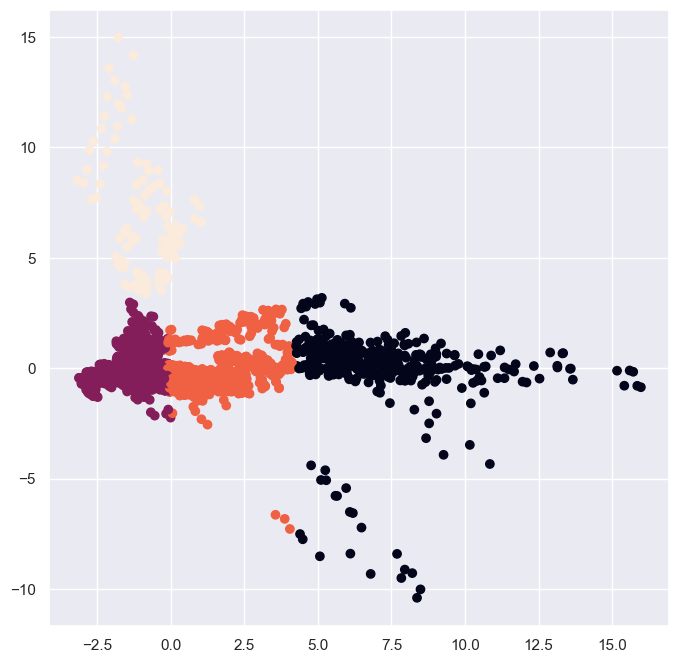

In [213]:
# Scatter plot on Principal components to visualize the spread of the data


plt.scatter(pcadata_df[0],pcadata_df[1],c=pcadata_df['Cluster_Id4'])


#### Inference:
- There is no much of overlapping for cluster 4. Try the model with other cluster number

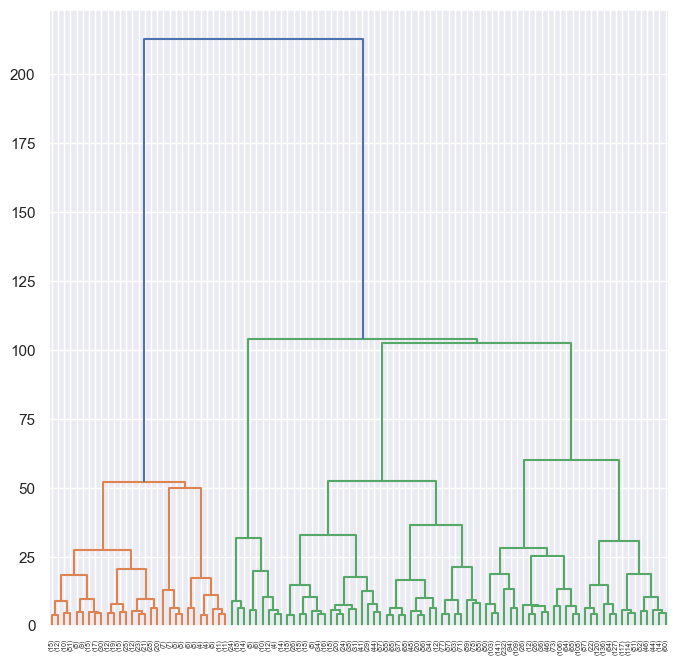

In [214]:
# Using Hierarichal Clustering
from scipy.cluster.hierarchy import linkage , dendrogram, fcluster,cophenet
mergings = linkage(pcadata, method='ward',metric='euclidean')
dendrogram(mergings,truncate_mode='lastp',p=100)
plt.show()

In [215]:
for i in [25,50,58,60,75,80,102,103,104,105,115,125,150,175,200,210,225,250]:
    clusters = fcluster(mergings, i, criterion='distance')
    print('The number of cluster for the distance of', i,' is ', len(np.unique(clusters)))

The number of cluster for the distance of 25  is  15
The number of cluster for the distance of 50  is  8
The number of cluster for the distance of 58  is  5
The number of cluster for the distance of 60  is  4
The number of cluster for the distance of 75  is  4
The number of cluster for the distance of 80  is  4
The number of cluster for the distance of 102  is  4
The number of cluster for the distance of 103  is  3
The number of cluster for the distance of 104  is  3
The number of cluster for the distance of 105  is  2
The number of cluster for the distance of 115  is  2
The number of cluster for the distance of 125  is  2
The number of cluster for the distance of 150  is  2
The number of cluster for the distance of 175  is  2
The number of cluster for the distance of 200  is  2
The number of cluster for the distance of 210  is  2
The number of cluster for the distance of 225  is  1
The number of cluster for the distance of 250  is  1


from around 60 to 102 the cluster remain as 4. From distance 105 to 210 the cluster remain as 2. so k = 2 could be better choice of cluster, but k=4 also accetable and espcially in this dataset there are 4 differnt product type exist. Students can proceed the further analysis with k=2 or 4

In [216]:
from scipy.spatial.distance import pdist
c, coph_dists = cophenet(mergings, pdist(pcadata))
print('The Cophenet correlation coefficient is ', c)

The Cophenet correlation coefficient is  0.7784048147578079


### 5.	Use the cluster labels from the best method above and interpret the clusters formed.

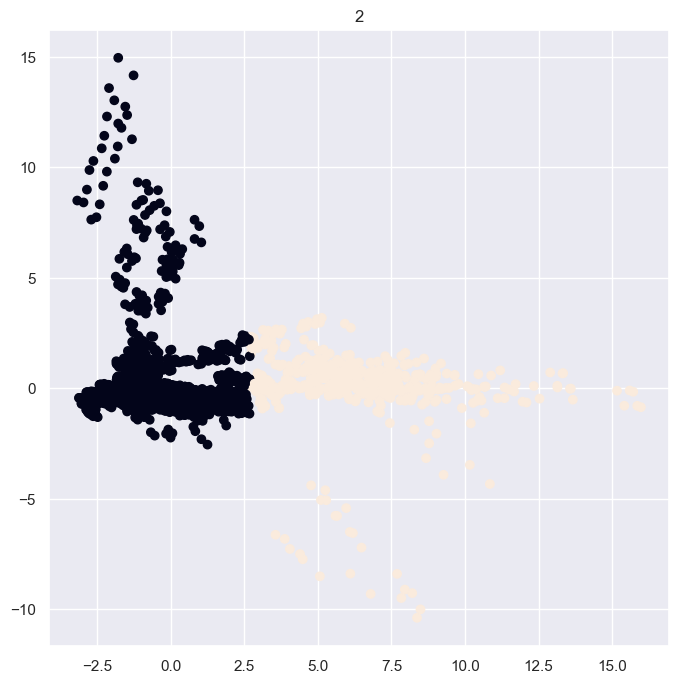

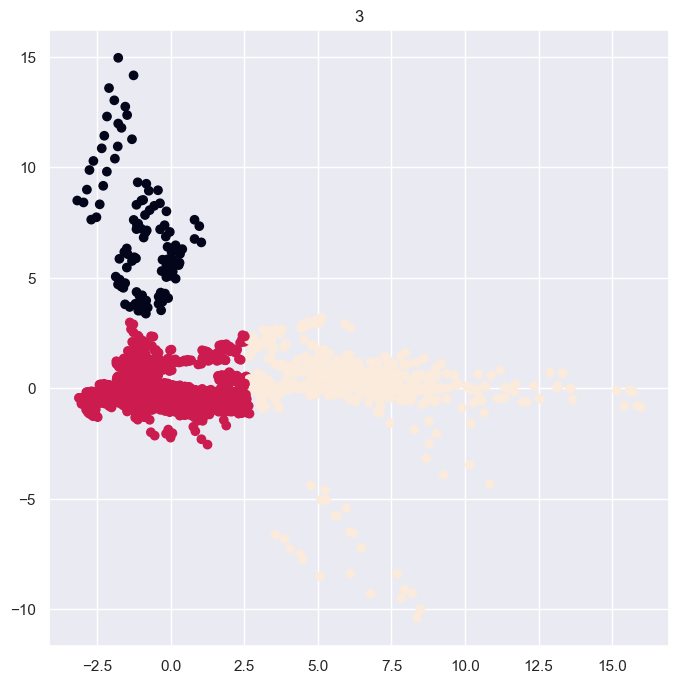

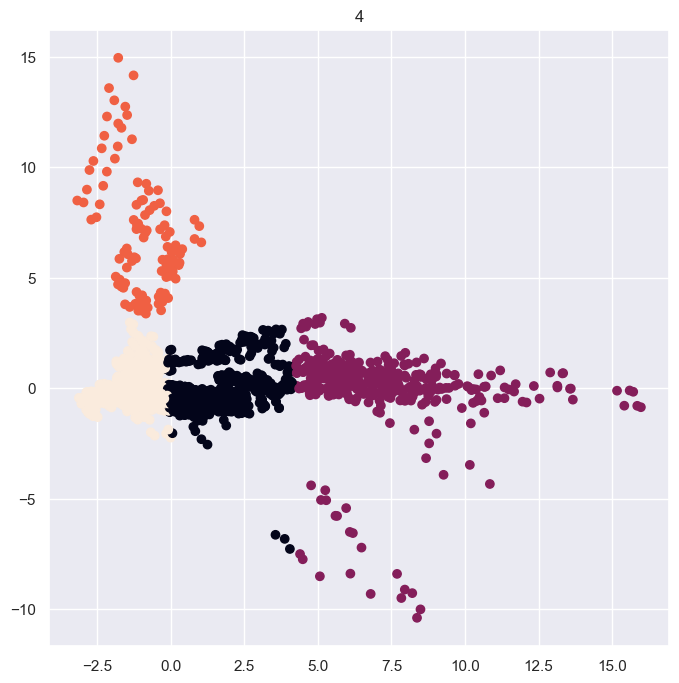

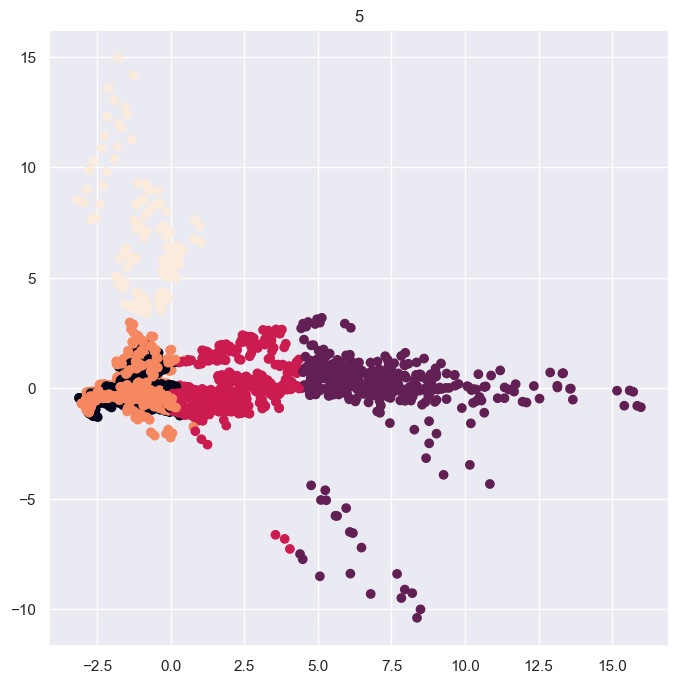

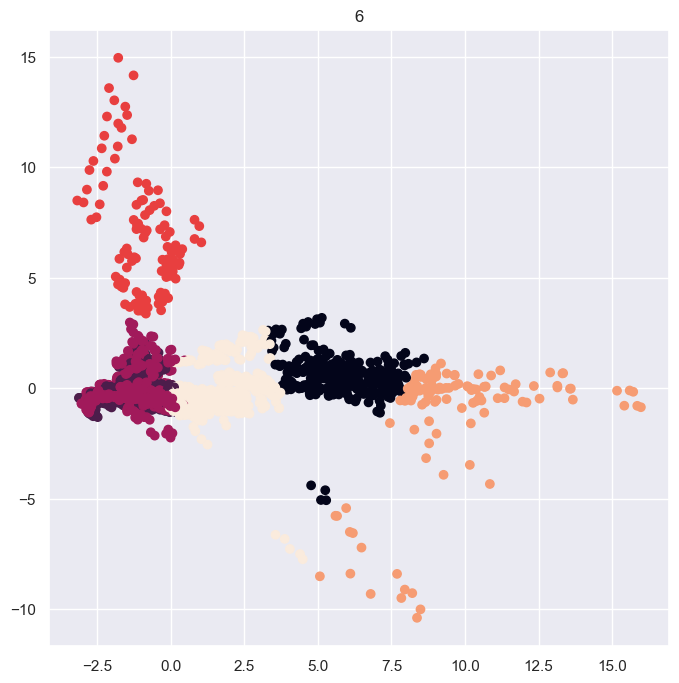

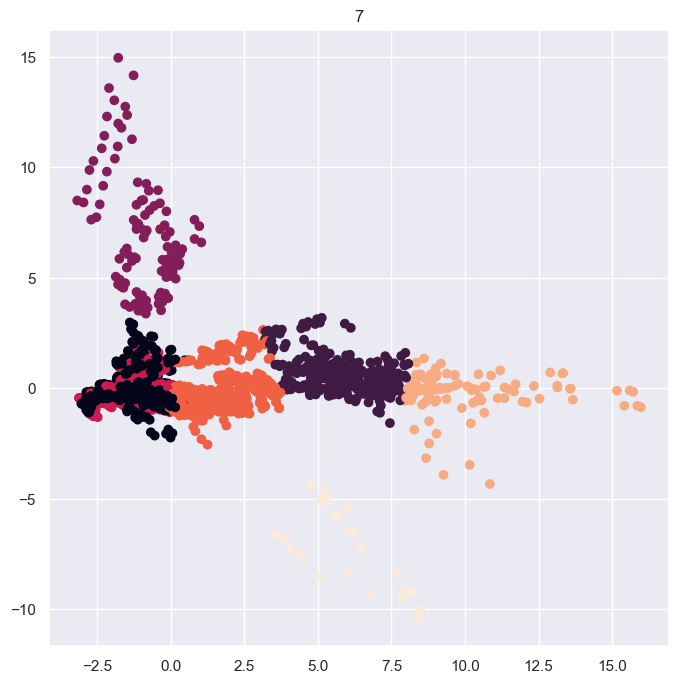

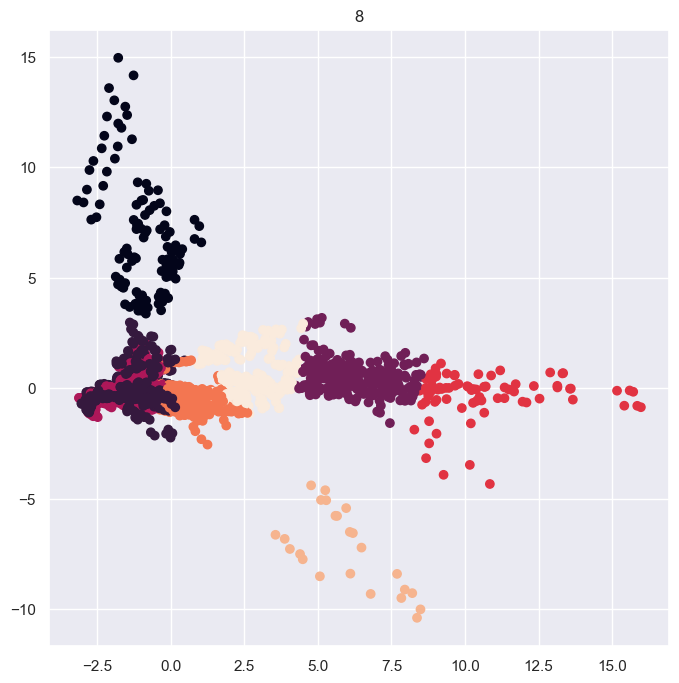

In [217]:
for i in [2,3,4,5,6,7,8]:
    mod=KMeans(i)
    mod.fit(pcadata)
    label=mod.labels_
    cent=mod.cluster_centers_
    # first two PCA components are used as a representaion for whole data just to visualize the cluster in 2D
    plt.scatter(pcadata[:,0],pcadata[:,1],c=label) 
    plt.title(i)
    plt.show()

In [218]:
# the figure k = 4 is not producing that much overlap (Remember this dataset is for 4 different Product Type)

In [219]:
k=4
mod=KMeans(k)
mod.fit(pcadata)
label=mod.labels_
cent=mod.cluster_centers_
clust_data=pd.DataFrame(pcadata,columns=col)
clust_data['Label']=label

In [220]:
clust_data.head(2)

,1,2,3,Label
0,0.5098,-0.7282,-1.2585,3
1,1.5840,-0.7894,-1.2452,3


<Axes: xlabel='1', ylabel='3'>

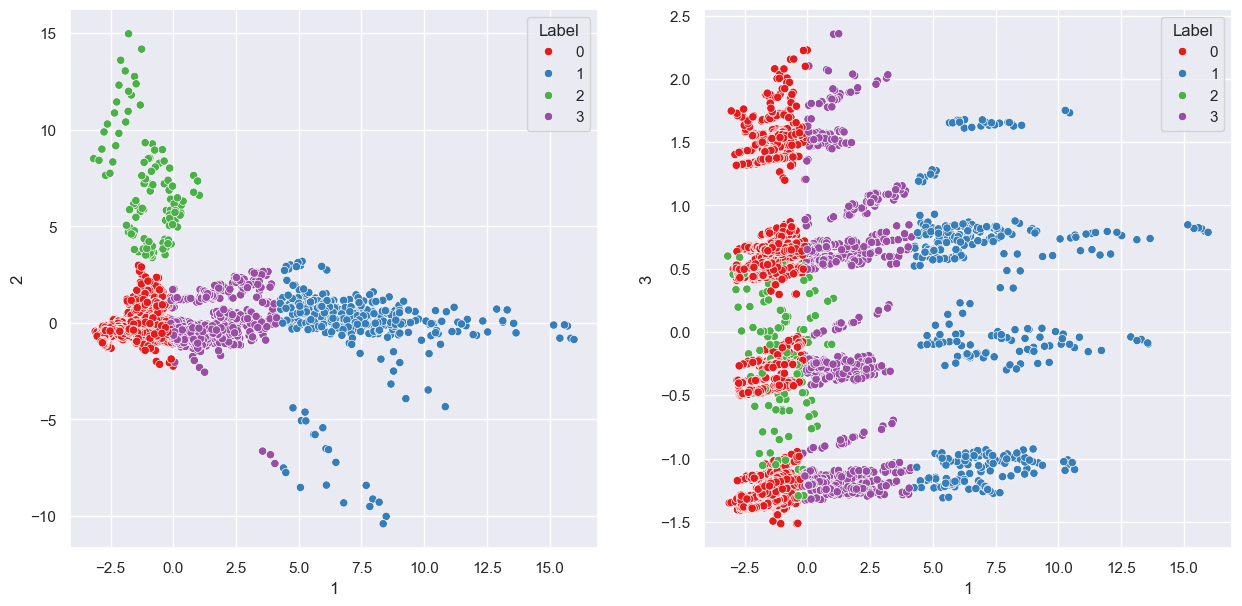

In [221]:
# Scatter plot on Principal components to visualize the spread of the data with the cluster labels
fig, axes = plt.subplots(1,2, figsize=(15,7))
sns.scatterplot(x=1,y=2,hue='Label',legend='full',palette="Set1",data=clust_data,ax=axes[0])
sns.scatterplot(x=1,y=3,hue='Label',legend='full',palette="Set1",data=clust_data,ax=axes[1])
#sns.scatterplot(x=1,y=4,hue='Label',legend='full',palette="Set1",data=clust_data,ax=axes[2])
#sns.scatterplot(x=1,y=5,hue='Label',legend='full',palette="Set1",data=clust_data,ax=axes[3])
#sns.scatterplot(x='PC_1',y='PC_6',hue='Label',legend='full',palette="Set1",data=clust_data,ax=axes[4])


In [222]:
data_full['Cluster4_Id']=label
data_full['Cluster4_Id'].value_counts()

0    2704
3    1031
1     403
2     110
Name: Cluster4_Id, dtype: int64

In [223]:
#data=data.drop('Cluster_Id5',1)

In [224]:
data_full.groupby('Cluster4_Id').mean()

,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,Market,Market Size
Cluster4_Id,,,,,,,,,,,,,
0,27.6712,62.5281,112.0355,47.0377,39.5189,17.8402,553.1490,32.8254,39.1309,59.3935,98.5244,1.3924,1.0000
1,265.0620,328.0670,581.6650,242.1737,110.4963,79.7122,1426.4566,227.3945,227.1216,320.0744,547.1960,1.1737,1.0000
2,-251.4455,-96.9636,105.5273,194.8182,112.5455,82.0909,2993.2545,-164.0000,170.3636,-74.5455,95.8182,1.5636,1.0000
3,102.3851,147.8341,262.7042,109.0747,63.9117,41.7847,759.9777,93.5015,98.7391,142.4733,241.2124,1.1465,1.0000


Student can write their own inferences in bussiness point of view using the above centroid( mean) values for each cluster group. The categorical features 'Market and 'Market Size' that we included is not creating any impact on clustering groups.

### 6.	Summarize as follows

a.	Summarize the overall fit of the model. Compare all the clustering models built and list down the measures to prove that it is a good model.

b.	Write down a business interpretation/explanation of the model. (List the countries to be focused on).

c.	What are the key risks to your results and interpretation?


In [225]:
k=2
mod=KMeans(k)
mod.fit(pcadata)
label=mod.labels_
cent=mod.cluster_centers_
clust_data=pd.DataFrame(pcadata,columns=col)
clust_data['Label']=label

out=clust_data['Label']
inp=clust_data.drop(columns='Label',axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(inp,out,test_size=0.3,random_state=48,stratify=out)

from sklearn.ensemble import RandomForestClassifier
rf_mod=RandomForestClassifier()
rf_mod.fit(xtrain,ytrain)
ypred=rf_mod.predict(xtest)

from sklearn.metrics import classification_report,cohen_kappa_score
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       154
           1       1.00      1.00      1.00      1121

    accuracy                           1.00      1275
   macro avg       1.00      1.00      1.00      1275
weighted avg       1.00      1.00      1.00      1275



With k=2, the cluster labels are exactly predicted by the ML model, which is the indicator for the uniform charecteristics of each cluster.

In [226]:
data_full.groupby('Cluster4_Id').mean()

,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,Market,Market Size
Cluster4_Id,,,,,,,,,,,,,
0,27.6712,62.5281,112.0355,47.0377,39.5189,17.8402,553.1490,32.8254,39.1309,59.3935,98.5244,1.3924,1.0000
1,265.0620,328.0670,581.6650,242.1737,110.4963,79.7122,1426.4566,227.3945,227.1216,320.0744,547.1960,1.1737,1.0000
2,-251.4455,-96.9636,105.5273,194.8182,112.5455,82.0909,2993.2545,-164.0000,170.3636,-74.5455,95.8182,1.5636,1.0000
3,102.3851,147.8341,262.7042,109.0747,63.9117,41.7847,759.9777,93.5015,98.7391,142.4733,241.2124,1.1465,1.0000


Student can write their own inferences in bussiness point of view using the above centroid( mean) values for each cluster group

Student can also analyse this model for differnt k

More EDA can be carried out for each group of data to explore more insights.

In [227]:
data.columns

Index(['Profit', 'Margin', 'Sales', 'COGS', 'Total Expenses', 'Marketing',
       'Inventory', 'Budget Profit', 'Budget COGS', 'Budget Margin',
       'Budget Sales', 'Area Code', 'ProductId', 'State', 'Market',
       'Market Size', 'Product Type', 'Product', 'Type', 'Cluster_Id4'],
      dtype='object')

In [228]:
data_product= pd.DataFrame(data['Product Type'])

In [229]:
data_product

,Product Type
0,Coffee
1,Coffee
2,Coffee
3,Coffee
4,Coffee
...,...
4243,Espresso
4244,Espresso
4245,Espresso
4246,Espresso


In [230]:
type(data_product)

pandas.core.frame.DataFrame

In [231]:
with_prod_data = pd.concat([data_full, data_product], axis=1)


In [232]:
with_prod_data.groupby('Cluster4_Id').get_group(2)['Product Type'].value_counts()

Coffee        38
Espresso      24
Herbal Tea    24
Tea           24
Name: Product Type, dtype: int64